<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%A8%8B%E5%BC%8F%E5%9F%BA%E6%9C%AC%E6%95%99%E5%AD%B8_1_%E8%82%A1%E7%A5%A8%E8%B2%B7%E8%B3%A3%E8%A8%88%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 取得股價資料

In [99]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

start_date = dt.datetime.now() - dt.timedelta(days=5*365)
end_date = dt.datetime.now()

tsm = yf.Ticker("2330.tw")
tsm_data = tsm.history(start=start_date, end=end_date)[['Open','High','Low','Close','Volume']]
for i in tsm_data.columns:
  tsm_data[i] = pd.to_numeric(tsm_data[i])
tsm_data.dropna()
tsm_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-26 00:00:00+08:00,212.482984,212.913111,210.762474,212.052856,35901810
2018-02-27 00:00:00+08:00,215.493827,215.493827,211.622681,211.622681,40818119
2018-03-01 00:00:00+08:00,209.902201,210.762456,208.181691,209.041946,39719984
2018-03-02 00:00:00+08:00,206.461197,207.321452,205.170814,206.461197,35139170
2018-03-05 00:00:00+08:00,208.611811,209.041939,206.891302,207.751556,27337846
...,...,...,...,...,...
2023-02-17 00:00:00+08:00,524.000000,524.000000,516.000000,518.000000,28121975
2023-02-20 00:00:00+08:00,514.000000,519.000000,511.000000,517.000000,20065156
2023-02-21 00:00:00+08:00,515.000000,517.000000,513.000000,516.000000,13504100


# 看股價線圖

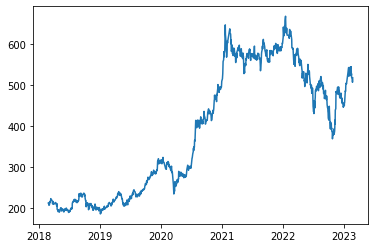

In [100]:
plt.plot(tsm_data.Close)

# 模擬進出場訊號

In [101]:
def add_label_column(df,lb,ub,n_day):
    shifted_close = df['Close'].shift(-n_day)
    is_decrease = shifted_close < df['Close'] * lb
    is_increase = shifted_close > df['Close'] * ub
    df['signal'] = pd.Series(0, index=df.index)
    df.loc[is_decrease, 'signal'] = -1
    df.loc[is_increase, 'signal'] = 1
    return df
df = add_label_column(tsm_data,0.97,1.03,7)
df

,Open,High,Low,Close,Volume,signal
Date,,,,,,
2018-02-26 00:00:00+08:00,212.482984,212.913111,210.762474,212.052856,35901810,0
2018-02-27 00:00:00+08:00,215.493827,215.493827,211.622681,211.622681,40818119,0
2018-03-01 00:00:00+08:00,209.902201,210.762456,208.181691,209.041946,39719984,1
2018-03-02 00:00:00+08:00,206.461197,207.321452,205.170814,206.461197,35139170,1
2018-03-05 00:00:00+08:00,208.611811,209.041939,206.891302,207.751556,27337846,1
...,...,...,...,...,...,...
2023-02-17 00:00:00+08:00,524.000000,524.000000,516.000000,518.000000,28121975,0
2023-02-20 00:00:00+08:00,514.000000,519.000000,511.000000,517.000000,20065156,0
2023-02-21 00:00:00+08:00,515.000000,517.000000,513.000000,516.000000,13504100,0


# 繪製進出場訊號

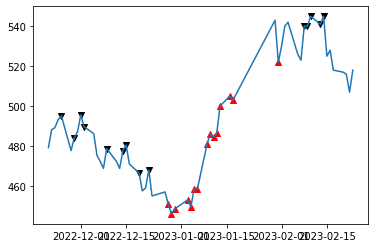

In [102]:
n = 60
temp_df = df.tail(n)
buy = temp_df[temp_df['signal']==1]['Close']
sell = temp_df[temp_df['signal']==-1]['Close']
plt.plot(temp_df['Close'])
plt.scatter(buy.index,buy.values,color='red',marker="^")
plt.scatter(sell.index,sell.values,color='black',marker="v")
plt.show()

# 模擬交易程序

In [103]:
account = 1000000
start_day = dt.datetime.now() - dt.timedelta(days=365*5)
end_day = dt.datetime.now()
share = 0
def Simulation_trading(df,account,start_day,end_day,share):
  total_asset = 0
  total_asset_history = []
  for i in df.loc[start_day:,:].index:
    action = df.loc[i,'signal']
    current_price = df.loc[i,'Close']
    #嘗試買入
    if action == 1:
      # 判斷是否有足夠金錢買入
      if account - current_price*1000 > 0:
        # 執行買入動作
        account -= current_price*1000
        share += 1
    #嘗試賣出
    elif action == -1:
      # 判斷是否有股份賣出
      if share > 0:
        # 執行賣出動作
        account += current_price*1000
        share -= 1
    else:
      #什麼也不做
      pass
    total_asset = account + share*current_price*1000
    total_asset_history.append(total_asset)
  return total_asset_history

# 必較單純持有跟有神一般策略的交易

<ipython-input-103-d0f63e4cd58c>:8: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  for i in df.loc[start_day:,:].index:


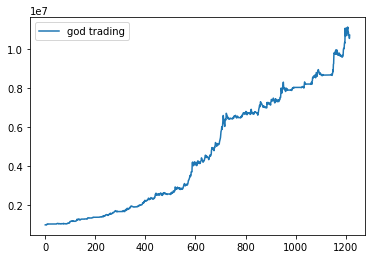

<ipython-input-104-a8dfe7a847aa>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  plt.plot(df.loc[start_day:,'Close'].values,label='only hold')


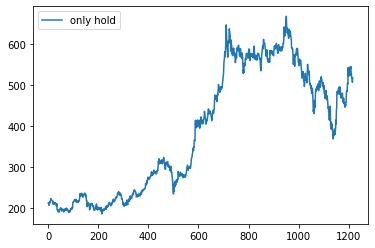

In [104]:
total_asset_history = Simulation_trading(df,account,start_day,end_day,share)
plt.plot(total_asset_history,label='god trading')
plt.legend()
plt.show()
plt.plot(df.loc[start_day:,'Close'].values,label='only hold')
plt.legend()
plt.show()